In [1]:
#Python Libraries for Mongos Database
import pymongo
from pymongo import MongoClient

#Python Library for Dataframe usage
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Serializing to a file
import _pickle as pickle

#Libraries for Graph
import networkx as nx

#etc
import random 
from collections import defaultdict

In [2]:
#accessing mongoDB
client = MongoClient()
database = client['food_map']   # Database name (to connect to)
collections = database['flavor_molecules']

#Getting the dataset from MongoDB into Pandas
flavorDB_pandas = pd.DataFrame(list(collections.find()))
flavorDB_pandas = flavorDB_pandas[["_id", "ingredient", "catgeory", "molecules", "molecule_IDs"]]

#Making each list into a set
flavorDB_pandas["set_molecules"] = flavorDB_pandas["molecules"].apply(lambda row: set(row))
flavorDB_pandas["set_molecules_ID"] = flavorDB_pandas["molecule_IDs"].apply(lambda row: set(row))
flavorDB_pandas["molecule_quantity"] = flavorDB_pandas["molecule_IDs"].apply(lambda row: len(row))
flavorDB_pandas["ingredient"] = flavorDB_pandas["ingredient"].apply(lambda row: row.lower())

In [3]:
#Importing a set that has all the ingredients with recipes
#Opening the pickled file
pickle_in = open("./data/ingredients_with_recipes.pickle","rb")
#Getting the dictionary from the pickle
set_of_ing_with_recipe = pickle.load(pickle_in)

In [4]:
flavorDB_pandas= flavorDB_pandas[flavorDB_pandas["ingredient"].isin(set_of_ing_with_recipe)]

In [5]:
flavorDB_pandas.head()

,_id,ingredient,catgeory,molecules,molecule_IDs,set_molecules,set_molecules_ID,molecule_quantity
0,5ca27b8f13218a1eabac63d6,egg,Animal Product,"[L-arginine, 3-Methylindole, 2,5-Dimethylpyraz...","[6322, 6736, 31252, 7909, 7284, 7501, 9609, 12...","{4-Methyl-2-pentanone, 4-Methylthiazole, hydro...","{8093, 998, 11747, 31252, 12232, 6202, 7501, 7...",55
9,5ca27b9b13218a1eabac63df,beer,Beverage Alcoholic,"[(2E,4E)-Undeca-2,4-dienal, Isoamyl butyrate, ...","[5367531, 7795, 20083, 10558, 16617, 12209, 22...","{Isoamyl Isovalerate, 2-Heptanol, Benzothiazol...","{5366074, 31245, 880, 7775, 31242, 520108, 650...",263
11,5ca27b9d13218a1eabac63e1,brandy,Beverage Alcoholic,"[2-Furaldehyde, 2-Methylhexanoic Acid, Ethyl 2...","[7362, 20653, 5364399, 61386, 12327, 7762, 805...","{2-Heptanol, trans-2-Hexen-1-Ol, 2-Phenylethyl...","{5363388, 11508, 7762, 8103, 7800, 8468, 64382...",50
13,5ca27ba013218a1eabac63e3,apple brandy,Beverage Alcoholic,"[2-Furaldehyde, 2-Methylhexanoic Acid, Ethyl 2...","[7362, 20653, 5364399, 61386, 9862, 7775, 1661...","{Ethyl Benzoate, Diethyl Succinate, 6-Methyl-5...","{8748, 10885, 5364778, 5363388, 31249, 7775, 7...",74
15,5ca27ba313218a1eabac63e5,blackberry brandy,Beverage Alcoholic,"[2-Furaldehyde, 2-Methylhexanoic Acid, Ethyl 2...","[7362, 20653, 5364399, 61386, 12327, 7762, 805...","{2-Heptanol, trans-2-Hexen-1-Ol, 2-Phenylethyl...","{5363388, 11508, 7762, 8103, 7800, 8468, 64382...",51


In [6]:
with open('flavorDB_pandas.pickle', 'wb') as file:
    file.write(pickle.dumps(flavorDB_pandas))
    file.close()

In [7]:
print("total number of ingredients: ", len(flavorDB_pandas["ingredient"]))

total number of ingredients:  268


In [8]:
flavorDB_pandas["catgeory"].unique()

array(['Animal Product', 'Beverage Alcoholic', 'Beverage Caffeinated',
       'Cereal', 'Maize', 'Dairy', 'Essential Oil', 'Seafood', 'Fish',
       'Flower', 'Fruit', 'Berry', 'Fruit Citrus', 'Fruit Essence',
       'Fungus', 'Herb', 'Meat', 'Nut', 'Seed', 'Legume', 'Plant',
       'Plant Derivative', 'Spice', 'Vegetable', 'Gourd',
       'Vegetable Root', 'Vegetable Stem', 'Vegetable Tuber', 'Cabbage',
       'Additive'], dtype=object)

In [9]:
print("the mean number of flavor molecules per ingredient: ", flavorDB_pandas["molecule_quantity"].mean())

the mean number of flavor molecules per ingredient:  98.69402985074628


In [10]:
print("the median number of flavor molecules per ingredient: ", flavorDB_pandas["molecule_quantity"].median())

the median number of flavor molecules per ingredient:  102.5


(array([86., 19., 50., 53., 32., 16.,  9.,  2.,  0.,  1.]),
 array([  1.,  40.,  79., 118., 157., 196., 235., 274., 313., 352., 391.]),
 <a list of 10 Patch objects>)

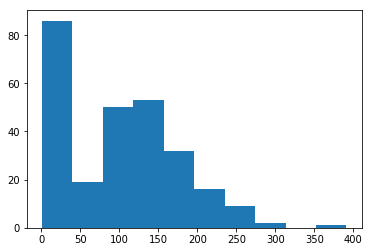

In [11]:
plt.hist(flavorDB_pandas["molecule_quantity"])

In [12]:
full_G=nx.Graph()

#iterate through each row of flavorDB based on if index is in random sample
for index, row in flavorDB_pandas.iterrows():
    #set of the ingredient from the "rows"
    set1= row["set_molecules"]
    #name of the ingredient from the "rows" 
    ingredient_1 = row["ingredient"]

    if True: # or len(set1) < 5: # To set if you want to consider all ingredients
        for molecule in set1:
            full_G.add_node(ingredient_1)
            full_G.node[ingredient_1]["ingredient_node"] = True
            full_G.add_node(molecule)
            full_G.node[molecule]["molecule_node"] = True
            full_G.add_edge(ingredient_1, molecule)

In [13]:
ingredient_nodes = nx.get_node_attributes(full_G, 'ingredient_node').keys()
molecule_nodes = nx.get_node_attributes(full_G, 'molecule_node').keys()

print("total number of nodes: ", full_G.number_of_nodes())
print("total number of ingredient nodes: ", len(ingredient_nodes))
print("total number of molecule nodes: ", len(molecule_nodes))

total number of nodes:  1734
total number of ingredient nodes:  267
total number of molecule nodes:  1467


In [14]:
print("total number of edges: ", full_G.number_of_edges())
print("total possible number of edges: 1779 molecules * 935 ingredients = 1663365")

total number of edges:  26318
total possible number of edges: 1779 molecules * 935 ingredients = 1663365


## Demonstration Using Milk and Coffee

In [15]:
demo_G=nx.Graph()

#iterate through each row of flavorDB based on if index is in random sample
for index, row in flavorDB_pandas.iterrows():
    #set of the ingredient from the "rows"
    set1= row["set_molecules"]
    #name of the ingredient from the "rows" 
    ingredient_1 = row["ingredient"]

    if ingredient_1 in ["coffee", "milk"]:
        for molecule in set1:
            # flavor_matrix_df[ingredient_1][molecule] = {'weight': 1}
            demo_G.add_node(ingredient_1)
            demo_G.node[ingredient_1]["ingredient_node"] = True
            demo_G.add_node(molecule)
            demo_G.node[molecule]["molecule_node"] = True
            demo_G.add_edge(ingredient_1, molecule)

In [16]:
ingredient_nodes = nx.get_node_attributes(demo_G, 'ingredient_node').keys()
molecule_nodes = nx.get_node_attributes(demo_G, 'molecule_node').keys()

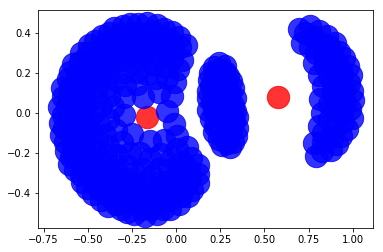

In [17]:
pos=nx.spring_layout(demo_G)
nx.draw_networkx_nodes(demo_G,pos,
                       nodelist=ingredient_nodes,
                       node_color='r',
                       node_size=500,
                   alpha=0.8)
nx.draw_networkx_nodes(demo_G,pos,
                       nodelist=molecule_nodes,
                       node_color='b',
                       node_size=500,
                   alpha=0.8)

/home/ryoiwata/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


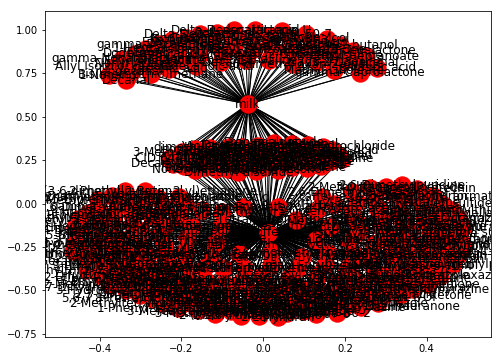

In [18]:
#Plotting the Graph 
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
nx.draw_networkx(demo_G, ax=ax)
plt.show()

In [19]:
centrality = nx.eigenvector_centrality(demo_G)

In [20]:
centrality

{'coffee': 0.6737698069618269,
 '2-Pentadecanone': 0.039781907828072595,
 'Isopropyl Formate': 0.039781907828072595,
 '2-Butenoic acid, hexyl ester': 0.039781907828072595,
 '2-Heptanol': 0.039781907828072595,
 '2,5-Dimethyl-4-ethyloxazole': 0.039781907828072595,
 '3,3-Dimethylacrylic acid': 0.039781907828072595,
 '5-Methylhexane-2,3-dione': 0.039781907828072595,
 '3-Methylindole': 0.0524516718979151,
 '5-Ethyl-2-hydroxy-3-methylcyclopent-2-en-1-one': 0.039781907828072595,
 'Decanoic acid': 0.0524516718979151,
 'quercetin': 0.039781907828072595,
 'Maltol': 0.0524516718979151,
 'Pyrrole': 0.0524516718979151,
 '6,7-Dihydro-2,3-Dimethyl-5H-Cyclopentapyrazine': 0.039781907828072595,
 '1-Furfurylpyrrole': 0.039781907828072595,
 '2-Methyl-3-furanthiol': 0.039781907828072595,
 '2-Propylphenol': 0.039781907828072595,
 '2-Acetyl-1-ethylpyrrole': 0.039781907828072595,
 '3-Hydroxy-2-Pentanone': 0.039781907828072595,
 'Styrene': 0.0524516718979151,
 '2,5-Dimethylpyrazine': 0.039781907828072595,
 'g

## Another Demo

In [29]:
demo_G=nx.Graph()

#iterate through each row of flavorDB based on if index is in random sample
for index, row in flavorDB_pandas.iterrows():
    #set of the ingredient from the "rows"
    set1= row["set_molecules"]
    #name of the ingredient from the "rows" 
    ingredient_1 = row["ingredient"]

    if ingredient_1 in ["lobster", "beef"]:
        for molecule in set1:
            # flavor_matrix_df[ingredient_1][molecule] = {'weight': 1}
            demo_G.add_node(ingredient_1)
            demo_G.node[ingredient_1]["ingredient_node"] = True
            demo_G.add_node(molecule)
            demo_G.node[molecule]["molecule_node"] = True
            demo_G.add_edge(ingredient_1, molecule)

In [30]:
ingredient_nodes = nx.get_node_attributes(demo_G, 'ingredient_node').keys()
molecule_nodes = nx.get_node_attributes(demo_G, 'molecule_node').keys()

In [31]:
node_to_edges_dict = {}
for node in demo_G.node:
    node_to_edges_dict[node] = len(demo_G.edges(node))
node_to_edges_dict

{'lobster': 6,
 'thiamine': 2,
 'Octanal': 1,
 'Bis(methylthio)methane': 2,
 'Thiamine Hydrochloride': 2,
 'Heptanoic Acid': 2,
 'CID 644104': 2,
 'beef': 92,
 'Dl-Alanine': 1,
 'oleic acid': 1,
 '6,7-Dihydro-2,3-Dimethyl-5H-Cyclopentapyrazine': 1,
 'gamma-Butyrolactone': 1,
 'Beta-Pinene': 1,
 'Styrene': 1,
 'Isobutyl Acetate': 1,
 '2,5-Dimethylfuran': 1,
 '5-Methylfurfural': 1,
 'Methyl Nonanoate': 1,
 'Heptyl acetate': 1,
 'Diethyl sulfide': 1,
 '1-Hexanethiol': 1,
 'Acetophenone': 1,
 'ethanol': 1,
 'Dimethyl trisulfide': 1,
 'Octan-2-ol': 1,
 'Propyl acetate': 1,
 '2,3-butanedione': 1,
 '2-Pentylthiophene': 1,
 'Tetradecanal': 1,
 '1-Dodecanol': 1,
 'methanethiol': 1,
 'Ethyl tetradecanoate': 1,
 'Dl-Phenylalanine': 1,
 'Methyl Hexanoate': 1,
 'Beta-Ionone': 1,
 'trans-2-Decenal': 1,
 'Bovolide': 1,
 '6-Methyl-5-Hepten-2-One': 1,
 '2,6-Dimethylpyridine': 1,
 'betaine': 1,
 'Ethyl Nonanoate': 1,
 'L-glutamic acid': 1,
 'Octane-2,3-dione': 1,
 '2,3-Diethyl-5-Methylpyrazine': 1,
 '2,

In [32]:
connected_nodes_only = [k for k,v in node_to_edges_dict.items() if v >= 2]


In [33]:
connected_edges_only = []
for node1 in connected_nodes_only:
    for node2 in connected_nodes_only :
        if node1 != node2:
            edge = tuple([node1, node2])
            connected_edges_only.append(edge)

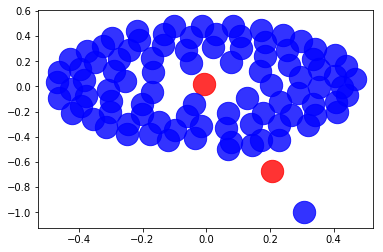

In [34]:
pos=nx.spring_layout(demo_G)
nx.draw_networkx_nodes(demo_G,pos,
                       nodelist=ingredient_nodes,
                       node_color='r',
                       node_size=500,
                   alpha=0.8)
nx.draw_networkx_nodes(demo_G,pos,
                       nodelist=molecule_nodes,
                       node_color='b',
                       node_size=500,
                   alpha=0.8)

In [35]:
connected_nodes_only

['lobster',
 'thiamine',
 'Bis(methylthio)methane',
 'Thiamine Hydrochloride',
 'Heptanoic Acid',
 'CID 644104',
 'beef']

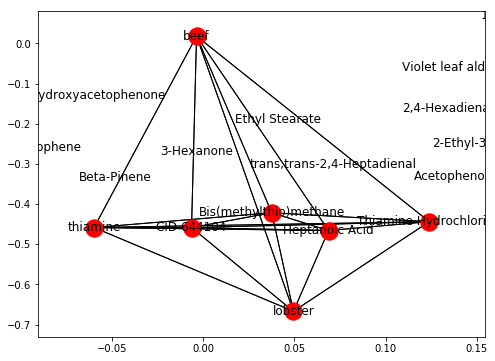

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
nx.draw_networkx(demo_G, edgelist = connected_edges_only, nodelist=connected_nodes_only, ax=ax)
plt.show()